In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
clientes = pd.read_csv('..\Data\BNK_FCT_CLIENTE.csv', sep = ";")

C:\Users\marti\AppData\Local\Temp\ipykernel_7044\3923255908.py:1: DtypeWarning: Columns (8,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  clientes = pd.read_csv('..\Data\BNK_FCT_CLIENTE.csv', sep = ";")


In [4]:
clientes.head()

,ID_CLIENTE,FECHA_DATO,FECHA_ALTA,FLAG_NUEVO_CLTE,ANTIGUEDAD,ID_CANAL,FLAG_ACTIVI,FLAG_ESTADO,ID_CODACCION,ID_ESTADO,ID_SEGMENTO_VALOR,ID_EMPLEADO,FLAG_CONYU_EMP,FECHA_ULT_CLTE_UNIP,FECHA_PROCESO
0,1375586,2015-01-28 00:00:00,2015-01-12 00:00:00,0.0,6.0,KCH-HL,1.0,1.0,1.0,0.0,S02 - NORMAL,NOEMP,NaN,NaN,2015-01-27 23:44:31
1,1050611,2015-01-28 00:00:00,2012-08-10 00:00:00,0.0,35.0,KCH-HE,0.0,1.0,1.0,1.0,S03 - ESTUDIANTE,NOEMP,NaN,NaN,2015-01-27 23:44:31
2,1050612,2015-01-28 00:00:00,2012-08-10 00:00:00,0.0,35.0,KCH-HE,0.0,1.0,1.0,1.0,S03 - ESTUDIANTE,NOEMP,NaN,NaN,2015-01-27 23:44:31
3,1050613,2015-01-28 00:00:00,2012-08-10 00:00:00,0.0,35.0,KCH-HD,0.0,1.0,1.0,1.0,S03 - ESTUDIANTE,NOEMP,NaN,NaN,2015-01-27 23:44:31
4,1050614,2015-01-28 00:00:00,2012-08-10 00:00:00,0.0,35.0,KCH-HE,1.0,1.0,1.0,0.0,S03 - ESTUDIANTE,NOEMP,NaN,NaN,2015-01-27 23:44:31


In [5]:
datos_clientes = clientes[["ID_CLIENTE", "FECHA_DATO", "FLAG_NUEVO_CLTE", "ANTIGUEDAD", "FLAG_ACTIVI", "FLAG_ESTADO", "ID_CODACCION", "ID_ESTADO"]]


In [6]:
tabla_final = pd.read_csv('..\Tabla_final_colab.csv', sep = ",")
tabla_final.head()

,CT_CTE,DEBITO_DIR,FECHA_DATO,ID_EMPLEADO,ID_SEGMENTO_VALOR,ANTIGUEDAD,ID_CLIENTE,RENTA,EDAD,EDAD_PUNTAJE,ID_GENERO,FLAG_PREAP,ID_PROD,FECHA_PROCESO,ACEPTADO
0,1.0,0.0,2015-01-28 00:00:00,0.0,2.0,6.0,1375586.0,87218.10,36.0,3.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
1,1.0,0.0,2015-01-28 00:00:00,0.0,1.0,35.0,1050612.0,122179.11,23.0,1.0,0.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
2,0.0,0.0,2015-01-28 00:00:00,0.0,1.0,35.0,1050613.0,119775.54,23.0,1.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
3,1.0,0.0,2015-01-28 00:00:00,0.0,1.0,35.0,1050615.0,22220.04,24.0,1.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
4,1.0,0.0,2015-01-28 00:00:00,0.0,1.0,35.0,1050616.0,295590.36,24.0,1.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0


In [7]:
tabla_final_id_fe_ac = tabla_final[["FECHA_DATO", "ID_CLIENTE", "ACEPTADO"]]
tabla_final_id_fe_ac

,FECHA_DATO,ID_CLIENTE,ACEPTADO
0,2015-01-28 00:00:00,1375586.0,0.0
1,2015-01-28 00:00:00,1050612.0,0.0
2,2015-01-28 00:00:00,1050613.0,0.0
3,2015-01-28 00:00:00,1050615.0,0.0
4,2015-01-28 00:00:00,1050616.0,0.0
...,...,...,...
602555,2016-02-28 00:00:00,899549.0,0.0
602556,2016-03-28 00:00:00,1441442.0,0.0
602557,2016-03-28 00:00:00,1454431.0,0.0
602558,2016-03-28 00:00:00,56812.0,0.0


In [8]:
info_clientes_aceptaron_o_no = pd.merge(tabla_final_id_fe_ac, datos_clientes, on = ['ID_CLIENTE', 'FECHA_DATO'], how='right')
info_clientes_aceptaron_o_no.dropna(inplace=True)
info_clientes_aceptaron_o_no

,FECHA_DATO,ID_CLIENTE,ACEPTADO,FLAG_NUEVO_CLTE,ANTIGUEDAD,FLAG_ACTIVI,FLAG_ESTADO,ID_CODACCION,ID_ESTADO
0,2015-01-28 00:00:00,1375586.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0
2,2015-01-28 00:00:00,1050612.0,0.0,0.0,35.0,0.0,1.0,1.0,1.0
3,2015-01-28 00:00:00,1050613.0,0.0,0.0,35.0,0.0,1.0,1.0,1.0
5,2015-01-28 00:00:00,1050615.0,0.0,0.0,35.0,0.0,1.0,1.0,1.0
6,2015-01-28 00:00:00,1050616.0,0.0,0.0,35.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
10841013,2016-02-28 00:00:00,899549.0,0.0,0.0,62.0,0.0,1.0,1.0,1.0
10865314,2016-03-28 00:00:00,1441442.0,0.0,0.0,7.0,0.0,1.0,1,1.0
10888449,2016-03-28 00:00:00,1454431.0,0.0,0.0,6.0,0.0,1.0,1,1.0
11152271,2016-03-28 00:00:00,56812.0,0.0,0.0,229.0,0.0,1.0,1,1


<Axes: >

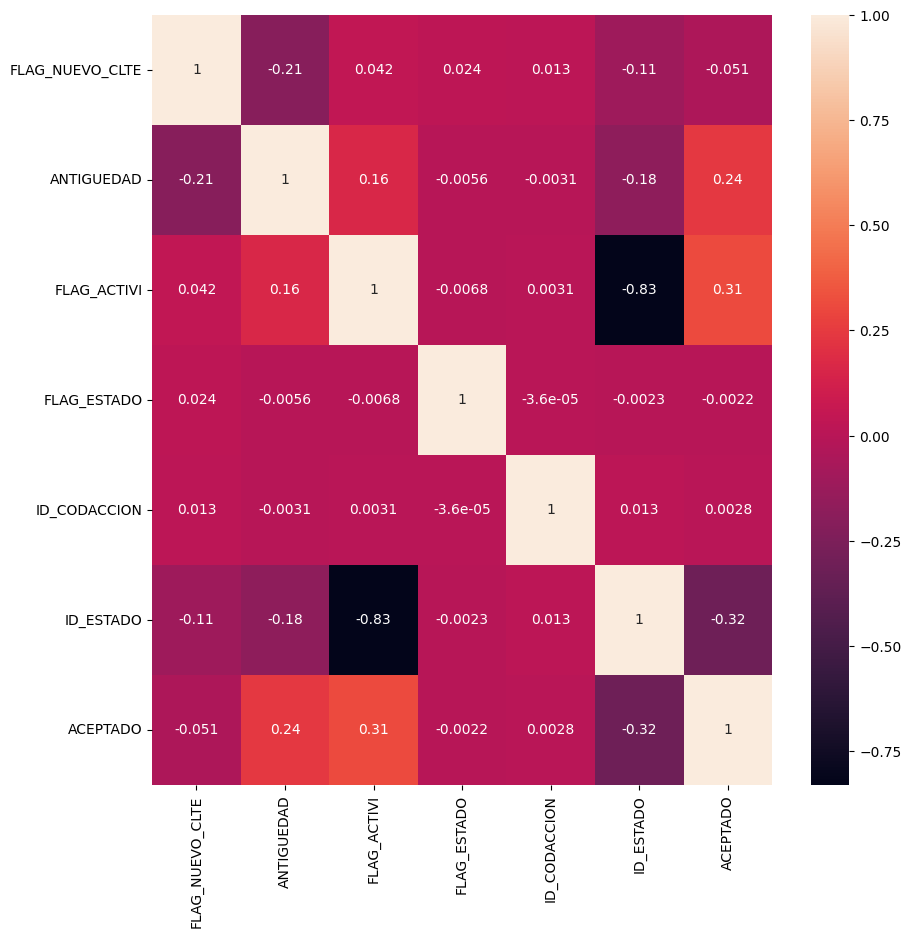

In [9]:
correlacion_clientes_con_aceptar = info_clientes_aceptaron_o_no[["FLAG_NUEVO_CLTE", "ANTIGUEDAD", "FLAG_ACTIVI", "FLAG_ESTADO", "ID_CODACCION", "ID_ESTADO", "ACEPTADO"]]
corr = correlacion_clientes_con_aceptar.corr().values
plt.figure(figsize = (10,10))
correlation_matrix = correlacion_clientes_con_aceptar.corr()
sns.heatmap(data = correlation_matrix, annot = True)

In [10]:
variables_clientes = info_clientes_aceptaron_o_no[["FECHA_DATO", "ID_CLIENTE", "ANTIGUEDAD", "FLAG_ACTIVI", "ID_ESTADO", "ACEPTADO"]]
variables_clientes

,FECHA_DATO,ID_CLIENTE,ANTIGUEDAD,FLAG_ACTIVI,ID_ESTADO,ACEPTADO
0,2015-01-28 00:00:00,1375586.0,6.0,1.0,0.0,0.0
2,2015-01-28 00:00:00,1050612.0,35.0,0.0,1.0,0.0
3,2015-01-28 00:00:00,1050613.0,35.0,0.0,1.0,0.0
5,2015-01-28 00:00:00,1050615.0,35.0,0.0,1.0,0.0
6,2015-01-28 00:00:00,1050616.0,35.0,0.0,1.0,0.0
...,...,...,...,...,...,...
10841013,2016-02-28 00:00:00,899549.0,62.0,0.0,1.0,0.0
10865314,2016-03-28 00:00:00,1441442.0,7.0,0.0,1.0,0.0
10888449,2016-03-28 00:00:00,1454431.0,6.0,0.0,1.0,0.0
11152271,2016-03-28 00:00:00,56812.0,229.0,0.0,1,0.0


In [ ]:
variables_clientes.to_csv(r'info_clientes.csv', index=False, header=True)